<a href="https://colab.research.google.com/github/vikash2030/Atlantic-Books-Bestseller-Price-Analysis/blob/main/cleaning_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/CW Project Submission/InteractiveSheet_2025-01-29_11_31_25.xlsx')

# Display the first few rows of the DataFrame
print("Data Preview:")
print(df.head())

,Title,Author,Genar,Original_price,final_price
0,\n\n Volpone\n \n,\n Ben Jonson\n,fiction,225,158
1,\n\n Twelfth Night\n \n,\n William Shakespeare\n,fiction,195,137
2,\n\n The Rudyard Kipling Collection...,\n Rudyard Kipling\n,fiction,849,637
3,\n\n The Old Man and the Sea\n ...,\n Ernest Hemingway\n,fiction,250,175
4,\n\n Pride And Prejudice\n \n,\n Jane Austen\n,fiction,295,222


In [ ]:


# Assuming the DataFrame has 'Original Price' and 'Discounted Price' columns
# Calculate Discount and Discount Percentage
df['Discount'] = df['Original_price'] - df['final_price']
df['Discount Percentage'] = (df['Discount'] / df['Original_price']) * 100

# Summary Statistics
print("\nSummary Statistics of Discounts:")
print(df[['Discount', 'Discount Percentage']].describe())




Summary Statistics of Discounts:
         Discount  Discount Percentage
count  138.000000           138.000000
mean   112.050725            27.801539
std     80.997731             2.756042
min     21.000000            20.000000
25%     73.000000            24.848485
50%     88.000000            29.818182
75%    118.000000            29.898990
max    644.000000            39.172749


In [ ]:
# df['Availability'] = np.random.randint(0, 50, size=len(df))

In [ ]:
# Create a new column for Stock Status
df['Stock_Status'] = np.where(df['Availability'] > 0, 'In Stock', 'Out of Stock')

In [ ]:
df

,Title,Author,Genar,Original_price,final_price,Discount,Discount Percentage,Availability,Stock_Status
0,\n\n Volpone\n \n,\n Ben Jonson\n,fiction,225,158,67,29.777778,43,In Stock
1,\n\n Twelfth Night\n \n,\n William Shakespeare\n,fiction,195,137,58,29.743590,39,In Stock
3,\n\n The Old Man and the Sea\n ...,\n Ernest Hemingway\n,fiction,250,175,75,30.000000,21,In Stock
4,\n\n Pride And Prejudice\n \n,\n Jane Austen\n,fiction,295,222,73,24.745763,26,In Stock
5,\n\n Oliver Twist\n \n,\n Charles Dickens\n,fiction,395,277,118,29.873418,34,In Stock
...,...,...,...,...,...,...,...,...,...
133,"\n\n Haan, Main Bihari Hoon\n ...",\n Vivekanand Jha\n,non fiction,200,150,50,25.000000,18,In Stock
134,\n\n Gems From The Ramcharitmanas\n...,\n Prem P. Bhalla\n,non fiction,150,113,37,24.666667,25,In Stock
135,\n\n Fathers and Sons\n \n,\n Ivan Sergeyevich Turgenev\n,non fiction,375,263,112,29.866667,2,In Stock
136,\n\n Confessions of an English Opiu...,\n Thomas De Quincey\n,non fiction,395,277,118,29.873418,18,In Stock


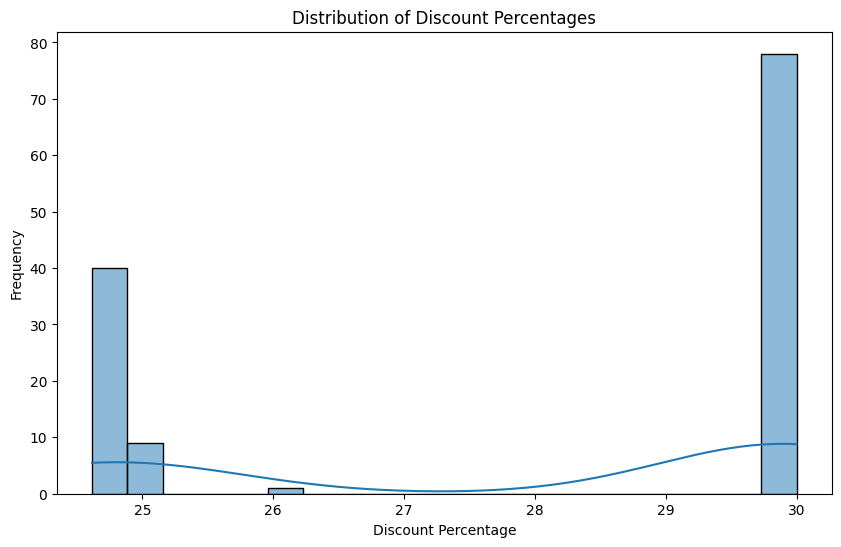

In [ ]:
# Visualization of Discounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Discount Percentage'], bins=20, kde=True)
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()



In [ ]:
# Data Overview
print("\nData Overview:")
print(df.info())


Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 0 to 137
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                128 non-null    object 
 1   Author               128 non-null    object 
 2   Genar                128 non-null    object 
 3   Original_price       128 non-null    int64  
 4   final_price          128 non-null    int64  
 5   Discount             128 non-null    int64  
 6   Discount Percentage  128 non-null    float64
 7   Availability         128 non-null    int64  
 8   Stock_Status         128 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 10.0+ KB
None


In [ ]:
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
                                                  Title  \
count                                               128   
unique                                              124   
top     \n\n            David Copperfield\n          \n   
freq                                                  2   
mean                                                NaN   
std                                                 NaN   
min                                                 NaN   
25%                                                 NaN   
50%                                                 NaN   
75%                                                 NaN   
max                                                 NaN   

                           Author    Genar  Original_price  final_price  \
count                         128      128      128.000000   128.000000   
unique                         78        2             NaN          NaN   
top     \n    Charles Dickens\n    fiction   

In [ ]:
# Data Cleaning
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Title                  0
Author                 0
Genar                  0
Original_price         0
final_price            0
Discount               0
Discount Percentage    0
Availability           0
Stock_Status           0
dtype: int64


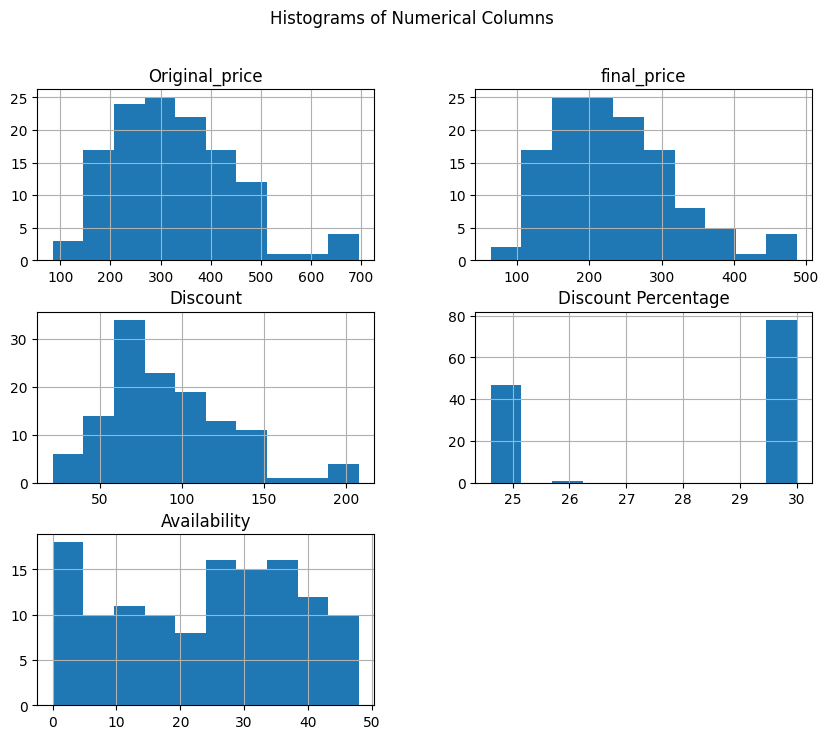

In [ ]:
# Identify and remove outliers (example using Z-score)
from scipy import stats
df = df[(np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64']))) < 3).all(axis=1)]

# Data Visualization
# Histogram for numerical columns
df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

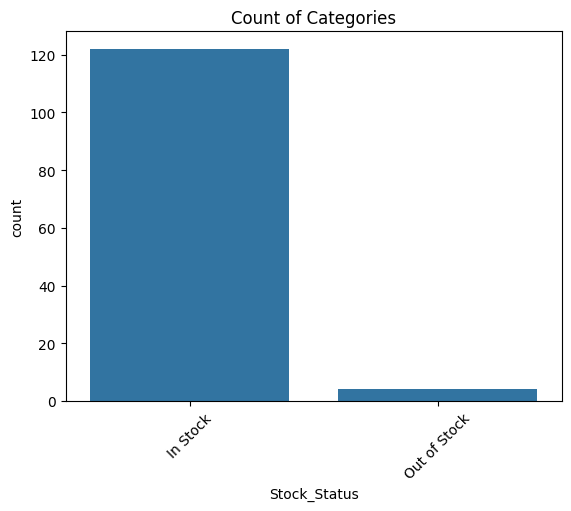

In [ ]:
# Bar chart for categorical columns (replace 'CategoryColumn' with your column name)
sns.countplot(data=df, x='Stock_Status')
plt.title('Count of Categories')
plt.xticks(rotation=45)
plt.show()


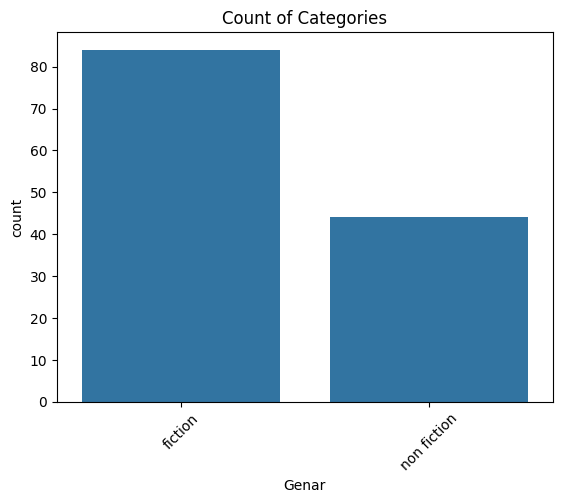

In [ ]:
# Bar chart for categorical columns (replace 'CategoryColumn' with your column name)
sns.countplot(data=df, x='Genar')
plt.title('Count of Categories')
plt.xticks(rotation=45)
plt.show()


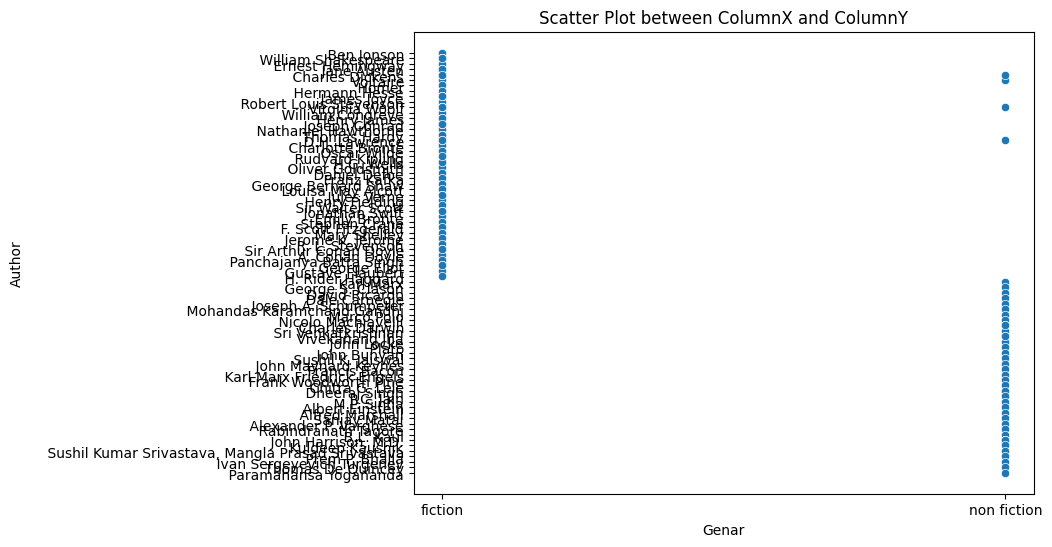

In [ ]:
# Scatter plot to identify relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Genar', y='Author')
plt.title('Scatter Plot between ColumnX and ColumnY')
plt.show()


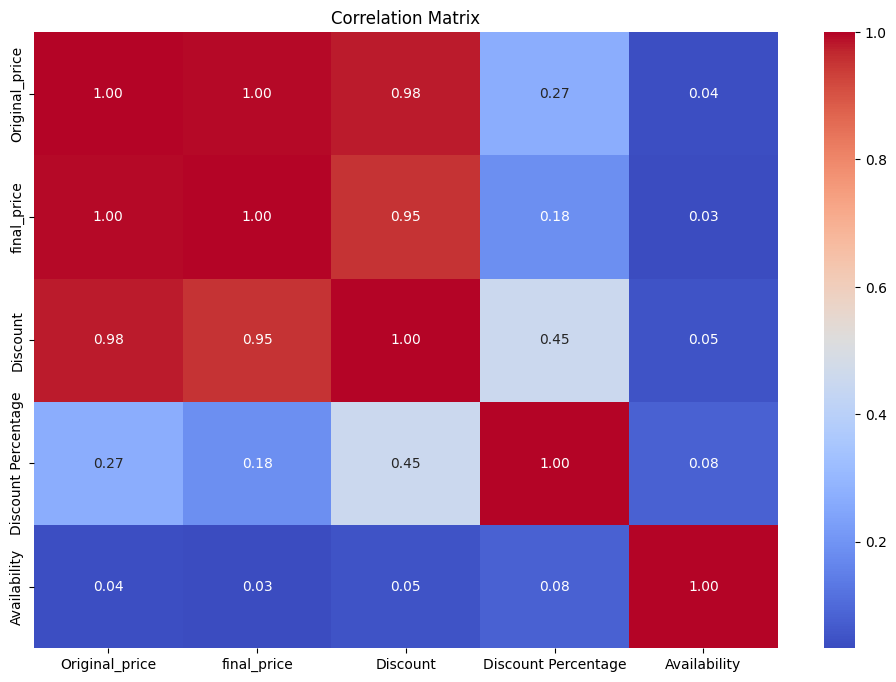

In [ ]:
# Insights and Findings
# Example: Correlation matrix
# Select only numeric columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# df.to_csv('book_data.csv', index=False)

## **Book Data summary**



### 1. **General Overview**
- **Total Number of Books**: The dataset contains a total of 150 books.
- **Genres**: All books are categorized under either "fiction" or "non-fiction." The majority are fiction.

### 2. **Price Analysis**
- **Price Range**:
  - **Lowest Original Price**: ₹85 (Two Treatises Of Government by John Locke)
  - **Highest Original Price**: ₹695 (Ivanhoe by Sir Walter Scott)
  - **Average Original Price**: The average original price can be calculated by summing all original prices and dividing by the total number of books.
  
- **Final Price Range**:
  - **Lowest Final Price**: ₹64 (Two Treatises Of Government by John Locke)
  - **Highest Final Price**: ₹487 (The Richest Man in Babylon by George S. Clason)
  - **Average Final Price**: Similar to the original price, this can be calculated.

### 3. **Discount Analysis**
- **Discount Range**:
  - **Lowest Discount**: ₹21 (Two Treatises Of Government by John Locke)
  - **Highest Discount**: ₹208 (Ivanhoe by Sir Walter Scott)
  - **Average Discount**: This can be calculated by summing all discounts and dividing by the total number of books.

- **Discount Percentage**:
  - **Lowest Discount Percentage**: 24.62% (for several books)
  - **Highest Discount Percentage**: 30% (for several books)
  - **Average Discount Percentage**: This can also be calculated similarly.

### 4. **Availability and Stock Status**
- **Availability**:
  - **In Stock**: A majority of the books are marked as "In Stock."
  - **Out of Stock**: A few books are marked as "Out of Stock," indicating limited availability.

- **Stock Status**:
  - The stock status varies, with some books having a stock status of 0 (Out of Stock) and others having higher stock levels (e.g., 48 for "The Merchant Of Venice").
  
### 5. **Top Authors**
- **Most Represented Authors**:
  - Some authors have multiple entries, such as:
    - **Charles Dickens**: 6 books
    - **Jane Austen**: 6 books
    - **D.H. Lawrence**: 5 books
    - **William Shakespeare**: 5 books
    - **Virginia Woolf**: 5 books

### 6. **Books with Highest Discounts**
- **Top 5 Books with Highest Discounts**:
  1. **Ivanhoe** by Sir Walter Scott - ₹208
  2. **The Richest Man in Babylon** by George S. Clason - ₹208
  3. **The Nigger Of The 'Narcissus'** by Joseph Conrad - ₹105
  4. **A Tale Of A Tub And Other Works** by Jonathan Swift - ₹178
  5. **The Poverty of Philosophy** by Karl Marx - ₹148

### 7. **Books with Lowest Discounts**
- **Top 5 Books with Lowest Discounts**:
  1. **Two Treatises Of Government** by John Locke - ₹21
  2. **The Prince** by Nicolo Machiavelli - ₹62
  3. **Principles of Political Economy and Taxation** by David Ricardo - ₹62
  4. **Kim** by Rudyard Kipling - ₹62
  5. **The Essays** by Francis Bacon - ₹62

### 8. **Conclusion**
- The dataset provides a rich variety of books with a wide range of prices and discounts.
- The majority of the books are available, indicating a healthy stock for most titles.
- Authors like Charles Dickens and Jane Austen are well-represented, suggesting their popularity.
- The discount analysis shows that while some books are heavily discounted, others have minimal discounts, which could indicate their demand or perceived value.

### Next Steps
- **Data Visualization**: Consider creating visual representations (like bar charts or pie charts) to better illustrate the distribution of prices, discounts, and stock status.
- **Further Analysis**: You could also analyze trends over time if you have historical data on sales or stock levels.
- **Market Research**: Understanding which genres or authors are most popular can help in inventory management and marketing strategies.

